In [1]:
# Importing Libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Loading the dataframe
df = pd.read_csv('./data/spotify_history.csv')
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [4]:
# Statistics of the numerical columns
df.describe()

,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


In [5]:
# Converting TS to datetime
df['playTime'] = pd.to_datetime(df['ts'])
df['year'] = pd.DatetimeIndex(df['playTime']).year
df['day'] = pd.DatetimeIndex(df['playTime']).day
df['day_name'] = df['playTime'].apply(lambda x: x.day_name())
df['month'] = df['playTime'].apply(lambda x: x.month_name())
df['time'] = pd.DatetimeIndex(df['playTime']).time
df['hours'] = pd.DatetimeIndex(df['playTime']).hour
df.drop(columns=['ts'], inplace=True)
df.head()

,spotify_track_uri,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,playTime,year,day,day_name,month,time,hours
0,2J3n32GeLmMjwuAzyhcSNe,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013-07-08 02:44:34,2013,8,Monday,July,02:44:34,2
1,1oHxIPqJyvAYHy0PVrDU98,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013-07-08 02:45:37,2013,8,Monday,July,02:45:37,2
2,487OPlneJNni3NWC8SYqhW,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013-07-08 02:50:24,2013,8,Monday,July,02:50:24,2
3,5IyblF777jLZj1vGHG2UD3,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013-07-08 02:52:40,2013,8,Monday,July,02:52:40,2
4,0GgAAB0ZMllFhbNc3mAodO,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,2013-07-08 03:17:52,2013,8,Monday,July,03:17:52,3


In [6]:
# Defining the timeframe
def categorize_time(hrs):
    if hrs in range(0, 4):
        return "Late Night"
    elif hrs in range(4, 8):
        return "Early Morning"
    elif hrs in range(8, 12):
        return "Morning"
    elif hrs in range(12, 16):
        return "Afternoon"
    elif hrs in range(16, 20):
        return "Evening"
    else:
        return "Night"
df['timeframe'] = df['hours'].apply(categorize_time)
df.head()

,spotify_track_uri,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,playTime,year,day,day_name,month,time,hours,timeframe
0,2J3n32GeLmMjwuAzyhcSNe,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013-07-08 02:44:34,2013,8,Monday,July,02:44:34,2,Late Night
1,1oHxIPqJyvAYHy0PVrDU98,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013-07-08 02:45:37,2013,8,Monday,July,02:45:37,2,Late Night
2,487OPlneJNni3NWC8SYqhW,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013-07-08 02:50:24,2013,8,Monday,July,02:50:24,2,Late Night
3,5IyblF777jLZj1vGHG2UD3,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013-07-08 02:52:40,2013,8,Monday,July,02:52:40,2,Late Night
4,0GgAAB0ZMllFhbNc3mAodO,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,2013-07-08 03:17:52,2013,8,Monday,July,03:17:52,3,Late Night


In [7]:
# Define the mapping
mapping = {
    'web player': 'Website',
    'windows': 'Windows',
    'android': 'Android',
    'iOS': 'iPhone',
    'cast to device': 'Casting',
    'mac': 'Macintosh'
}

# Redefining the platform
df['platform'] = df['platform'].map(mapping)
df.head()

,spotify_track_uri,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,playTime,year,day,day_name,month,time,hours,timeframe
0,2J3n32GeLmMjwuAzyhcSNe,Website,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013-07-08 02:44:34,2013,8,Monday,July,02:44:34,2,Late Night
1,1oHxIPqJyvAYHy0PVrDU98,Website,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013-07-08 02:45:37,2013,8,Monday,July,02:45:37,2,Late Night
2,487OPlneJNni3NWC8SYqhW,Website,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013-07-08 02:50:24,2013,8,Monday,July,02:50:24,2,Late Night
3,5IyblF777jLZj1vGHG2UD3,Website,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013-07-08 02:52:40,2013,8,Monday,July,02:52:40,2,Late Night
4,0GgAAB0ZMllFhbNc3mAodO,Website,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,2013-07-08 03:17:52,2013,8,Monday,July,03:17:52,3,Late Night


In [8]:
# Calculated the hours & minutes played
df['mins_played'] = df['ms_played'].apply(lambda x: x / 60000).round(3)
df['hrs_played'] = df['mins_played'].apply(lambda x: x / 60).round(3)
df.head()

,spotify_track_uri,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,playTime,year,day,day_name,month,time,hours,timeframe,mins_played,hrs_played
0,2J3n32GeLmMjwuAzyhcSNe,Website,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013-07-08 02:44:34,2013,8,Monday,July,02:44:34,2,Late Night,0.053,0.001
1,1oHxIPqJyvAYHy0PVrDU98,Website,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013-07-08 02:45:37,2013,8,Monday,July,02:45:37,2,Late Night,1.031,0.017
2,487OPlneJNni3NWC8SYqhW,Website,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013-07-08 02:50:24,2013,8,Monday,July,02:50:24,2,Late Night,4.756,0.079
3,5IyblF777jLZj1vGHG2UD3,Website,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013-07-08 02:52:40,2013,8,Monday,July,02:52:40,2,Late Night,2.234,0.037
4,0GgAAB0ZMllFhbNc3mAodO,Website,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,2013-07-08 03:17:52,2013,8,Monday,July,03:17:52,3,Late Night,0.000,0.000


In [9]:
# Categorizing the platform
def categorize_platform(plt):
    if plt == 'Android' or plt == 'iPhone':
        return "Mobile"
    elif plt == 'Windows' or plt == 'Macintosh':
        return "Desktop"
    elif plt == 'Website':
        return "Web"
    else:
        return "Other"

df['device'] = df['platform'].apply(categorize_platform)
df.head()

,spotify_track_uri,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,...,year,day,day_name,month,time,hours,timeframe,mins_played,hrs_played,device
0,2J3n32GeLmMjwuAzyhcSNe,Website,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,...,2013,8,Monday,July,02:44:34,2,Late Night,0.053,0.001,Web
1,1oHxIPqJyvAYHy0PVrDU98,Website,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,...,2013,8,Monday,July,02:45:37,2,Late Night,1.031,0.017,Web
2,487OPlneJNni3NWC8SYqhW,Website,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,...,2013,8,Monday,July,02:50:24,2,Late Night,4.756,0.079,Web
3,5IyblF777jLZj1vGHG2UD3,Website,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,...,2013,8,Monday,July,02:52:40,2,Late Night,2.234,0.037,Web
4,0GgAAB0ZMllFhbNc3mAodO,Website,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,...,2013,8,Monday,July,03:17:52,3,Late Night,0.000,0.000,Web


In [10]:
# Reordering columns
# Define the new column order
new_order = [
    'spotify_track_uri', 'track_name', 'artist_name', 'album_name',             # Track Details
    'ms_played', 'mins_played', 'hrs_played', 'playTime',                       # Playtime Data
    'year', 'month', 'day', 'day_name', 'time', 'hours', 'timeframe',           # Time Details
    'platform', 'device',                                                       # Platform & Device Info
    'reason_start', 'reason_end', 'shuffle', 'skipped'                          # Play Behavior
]

# Reorder the DataFrame
df = df[new_order]
df.head()

,spotify_track_uri,track_name,artist_name,album_name,ms_played,mins_played,hrs_played,playTime,year,month,...,day_name,time,hours,timeframe,platform,device,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,3185,0.053,0.001,2013-07-08 02:44:34,2013,July,...,Monday,02:44:34,2,Late Night,Website,Web,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,61865,1.031,0.017,2013-07-08 02:45:37,2013,July,...,Monday,02:45:37,2,Late Night,Website,Web,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,285386,4.756,0.079,2013-07-08 02:50:24,2013,July,...,Monday,02:50:24,2,Late Night,Website,Web,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,134022,2.234,0.037,2013-07-08 02:52:40,2013,July,...,Monday,02:52:40,2,Late Night,Website,Web,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,Half Mast,Empire Of The Sun,Walking On A Dream,0,0.000,0.000,2013-07-08 03:17:52,2013,July,...,Monday,03:17:52,3,Late Night,Website,Web,clickrow,nextbtn,False,False


In [11]:
# Filling out the empty columns
df.isnull().sum()

spotify_track_uri      0
track_name             0
artist_name            0
album_name             0
ms_played              0
mins_played            0
hrs_played             0
playTime               0
year                   0
month                  0
day                    0
day_name               0
time                   0
hours                  0
timeframe              0
platform               0
device                 0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [12]:
# Fill missing values with 'unknown'
df['reason_start'] = df['reason_start'].fillna('unknown')
df['reason_end'] = df['reason_end'].fillna('unknown')
df.isna().sum()

spotify_track_uri    0
track_name           0
artist_name          0
album_name           0
ms_played            0
mins_played          0
hrs_played           0
playTime             0
year                 0
month                0
day                  0
day_name             0
time                 0
hours                0
timeframe            0
platform             0
device               0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

In [13]:
# Define the folder name
folder_name = "images"

# Check if the folder exists
if os.path.exists(folder_name):
    # If it exists, remove it
    shutil.rmtree(folder_name)
    print(f"Existing folder '{folder_name}' has been removed.")

# Create a new folder
os.makedirs(folder_name)
print(f"New folder '{folder_name}' has been created.")

Existing folder 'images' has been removed.
New folder 'images' has been created.


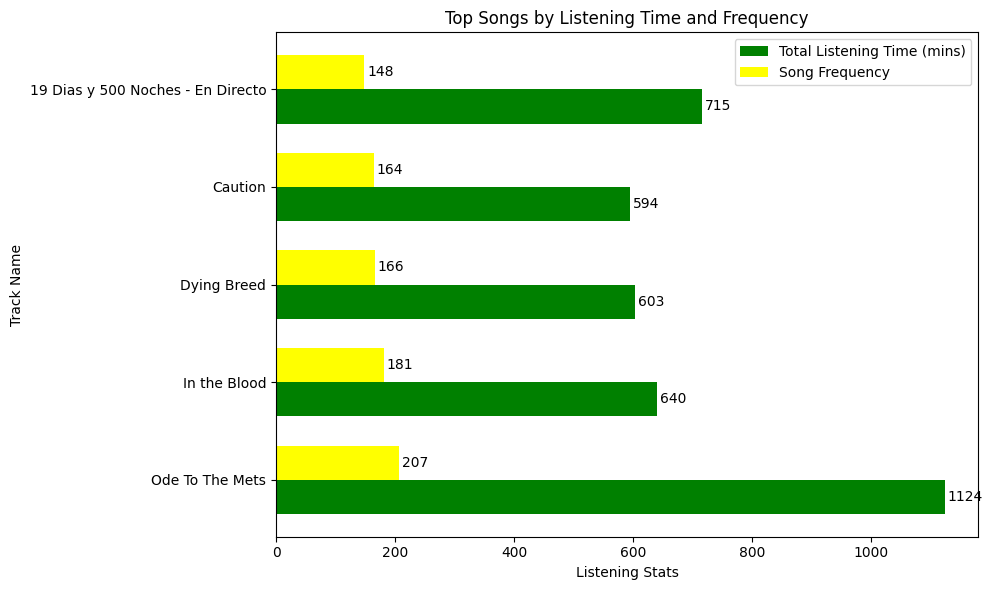

In [14]:
# Aggregate playtime (sum) and frequency (count) by track_name
song_stats = df.groupby('track_name').agg(
    total_playtime_mins=('mins_played', 'sum'),
    song_frequency=('track_name', 'count')
).reset_index()

# Round playtime to the nearest decimal
song_stats['total_playtime_mins'] = song_stats['total_playtime_mins'].round().astype('int')

# Sort by song frequency in descending order and take the top 5
top_songs = song_stats.sort_values(by='song_frequency', ascending=False).head(5).reset_index(drop=True)

# Data preparation
artists = top_songs['track_name']
playtime = top_songs['total_playtime_mins']
song_frequency = top_songs['song_frequency']

# Y-axis positions
y = np.arange(len(artists))
bar_height = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.barh(y - bar_height / 2, playtime, bar_height, label='Total Listening Time (mins)', color='green')
bar2 = ax.barh(y + bar_height / 2, song_frequency, bar_height, label='Song Frequency', color='yellow')

# Add labels to bars
for i, v in enumerate(playtime):
    ax.text(v + 5, y[i] - bar_height / 2, str(v), va='center', ha='left', color='black', fontsize=10)
for i, v in enumerate(song_frequency):
    ax.text(v + 5, y[i] + bar_height / 2, str(v), va='center', ha='left', color='black', fontsize=10)

# Labels and title
ax.set_ylabel('Track Name')
ax.set_xlabel('Listening Stats')
ax.set_title('Top Songs by Listening Time and Frequency')
ax.set_yticks(y)
ax.set_yticklabels(artists)
ax.legend()

# Display the chart
plt.tight_layout()
plt.savefig('images/top_songs.png', dpi = 300)
plt.show()

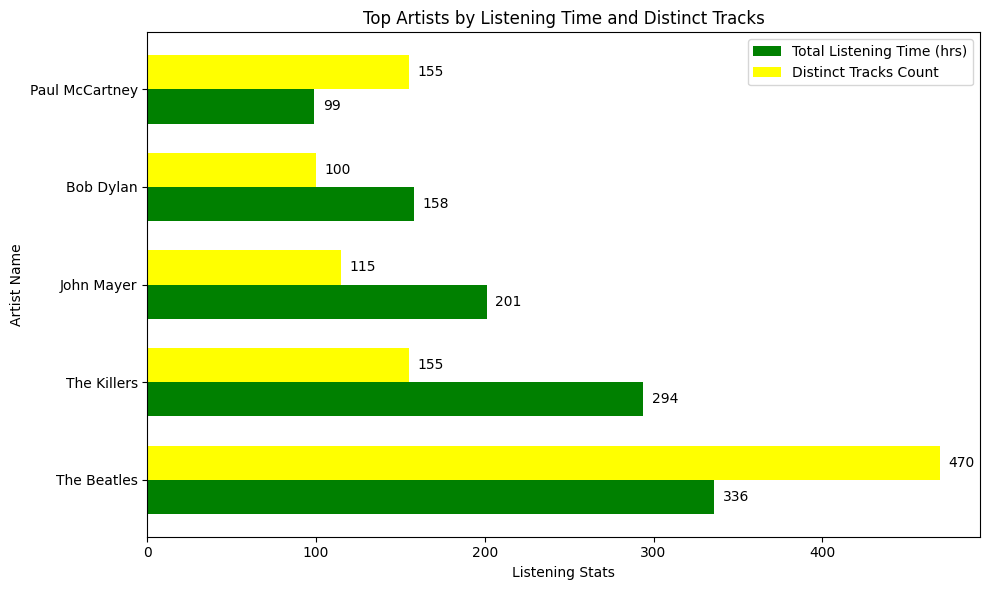

In [15]:
# Aggregate total playtime (sum) and distinct track count by artist_name
artist_stats = df.groupby('artist_name').agg(
    total_playtime_hrs=('hrs_played', 'sum'),
    distinct_tracks_count=('track_name', 'nunique')
).reset_index()

# Round total playtime to the nearest decimal
artist_stats['total_playtime_hrs'] = artist_stats['total_playtime_hrs'].round().astype('int')

# Sort by total playtime in descending order and take the top 5
top_5_artists = artist_stats.sort_values(by='total_playtime_hrs', ascending=False).head(5).reset_index(drop=True)

# Data preparation
artists = top_5_artists['artist_name']
playtime = top_5_artists['total_playtime_hrs']
tracks_count = top_5_artists['distinct_tracks_count']

# Y-axis positions
y = np.arange(len(artists))
bar_height = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.barh(y - bar_height / 2, playtime, bar_height, label='Total Listening Time (hrs)', color='green')
bar2 = ax.barh(y + bar_height / 2, tracks_count, bar_height, label='Distinct Tracks Count', color='yellow')

# Add labels to bars
for i, v in enumerate(playtime):
    ax.text(v + 5, y[i] - bar_height / 2, str(v), va='center', ha='left', color='black', fontsize=10)
for i, v in enumerate(tracks_count):
    ax.text(v + 5, y[i] + bar_height / 2, str(v), va='center', ha='left', color='black', fontsize=10)

# Labels and title
ax.set_ylabel('Artist Name')
ax.set_xlabel('Listening Stats')
ax.set_title('Top Artists by Listening Time and Distinct Tracks')
ax.set_yticks(y)
ax.set_yticklabels(artists)
ax.legend()

# Display the chart
plt.tight_layout()
plt.savefig('images/top_artists.png', dpi = 300)
plt.show()

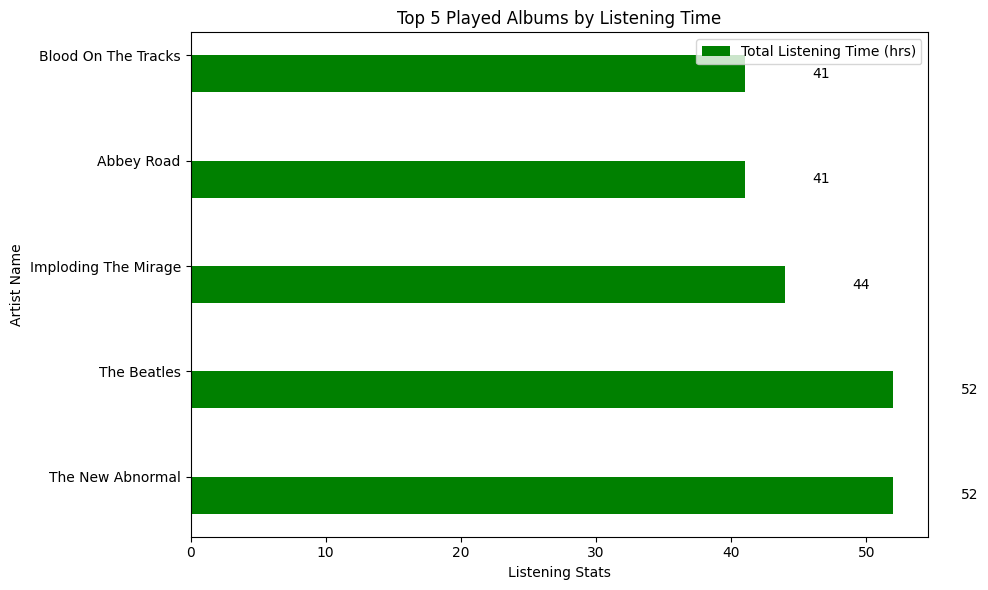

In [16]:
# Aggregate total playtime (sum) and distinct track count by album_name
album_stats = df.groupby('album_name').agg(
    total_playtime_hrs=('hrs_played', 'sum')
).reset_index()

# Round total playtime to the nearest decimal
album_stats['total_playtime_hrs'] = album_stats['total_playtime_hrs'].round().astype('int')

# Sort by total playtime in descending order and take the top 5
top_5_albums = album_stats.sort_values(by='total_playtime_hrs', ascending=False).head(5).reset_index(drop=True)

# Data preparation
albums = top_5_albums['album_name']
playtime = top_5_albums['total_playtime_hrs']

# Y-axis positions
y = np.arange(len(albums))
bar_height = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.barh(y - bar_height / 2, playtime, bar_height, label='Total Listening Time (hrs)', color='green')

# Add labels to bars
for i, v in enumerate(playtime):
    ax.text(v + 5, y[i] - bar_height / 2, str(v), va='center', ha='left', color='black', fontsize=10)

# Labels and title
ax.set_ylabel('Artist Name')
ax.set_xlabel('Listening Stats')
ax.set_title('Top 5 Played Albums by Listening Time')
ax.set_yticks(y)
ax.set_yticklabels(albums)
ax.legend()

# Display the chart
plt.tight_layout()
plt.savefig('images/top_albums.png', dpi = 300)
plt.show()

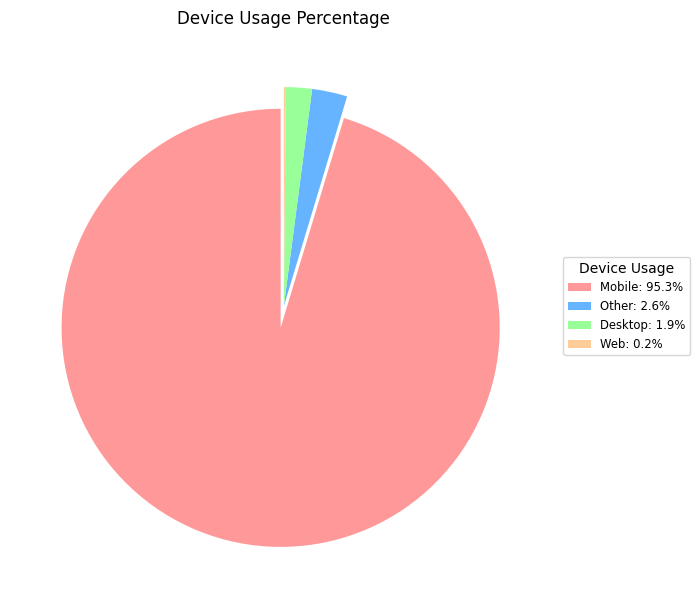

In [17]:
# Calculate the percentage of usage by device
device_counts = df['device'].value_counts()
device_percentages = device_counts / device_counts.sum() * 100

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, _ = ax.pie(
    device_percentages,
    autopct=None,  # Do not show percentages inside the chart
    startangle=90, 
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
    explode=[0.1 if i == device_percentages.max() else 0 for i in device_percentages],
)

# Add legend with device names and percentages
ax.legend(
    wedges,
    [f"{device}: {percentage:.1f}%" for device, percentage in zip(device_percentages.index, device_percentages)],
    title="Device Usage",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize='small',
)

plt.title('Device Usage Percentage')
plt.tight_layout()
plt.savefig('images/device_pct.png', dpi = 300)
plt.show()

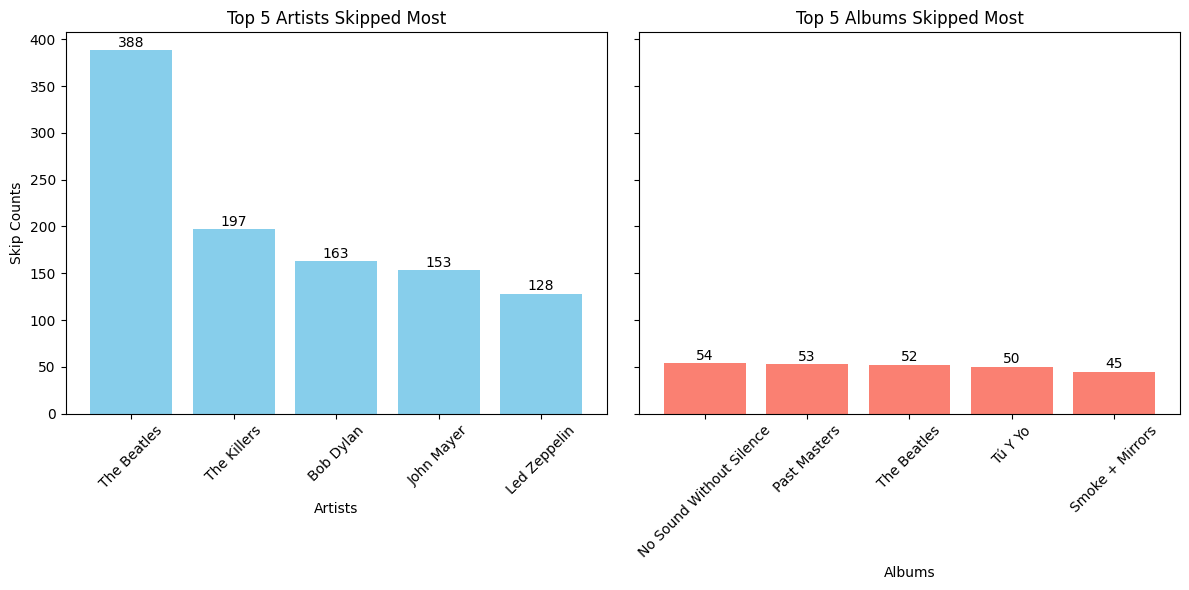

In [18]:
# Filter for rows where 'skipped' is True
skipped_data = df[df['skipped']]

# Top 5 artists with the most skips
top_artists = skipped_data['artist_name'].value_counts().head(5)

# Top 5 albums with the most skips
top_albums = skipped_data['album_name'].value_counts().head(5)

# Plotting the bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar chart for top 5 artists
axes[0].bar(top_artists.index, top_artists.values, color='skyblue')
for i, value in enumerate(top_artists.values):
    axes[0].text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
axes[0].set_title('Top 5 Artists Skipped Most')
axes[0].set_xlabel('Artists')
axes[0].set_ylabel('Skip Counts')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for top 5 albums
axes[1].bar(top_albums.index, top_albums.values, color='salmon')
for i, value in enumerate(top_albums.values):
    axes[1].text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
axes[1].set_title('Top 5 Albums Skipped Most')
axes[1].set_xlabel('Albums')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('images/skipped_stats.png', dpi = 300)
plt.show()

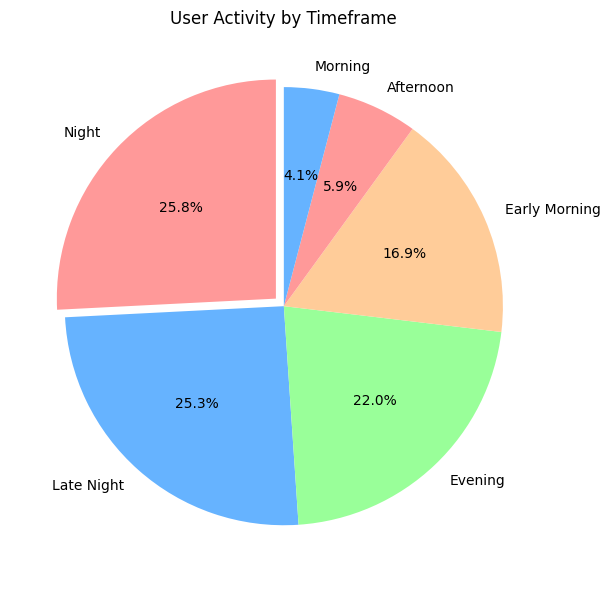

In [19]:
# Calculate the percentage of user activity by timeframe
timeframe_counts = df['timeframe'].value_counts()
timeframe_percentages = timeframe_counts / timeframe_counts.sum() * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
timeframe_percentages.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
    labels=timeframe_percentages.index,
    explode=[0.05 if i == timeframe_percentages.max() else 0 for i in timeframe_percentages],
)

plt.title('User Activity by Timeframe')
plt.ylabel('')  # Remove default y-axis label
plt.tight_layout()
plt.savefig('images/tf_activity.png', dpi = 300)
plt.show()

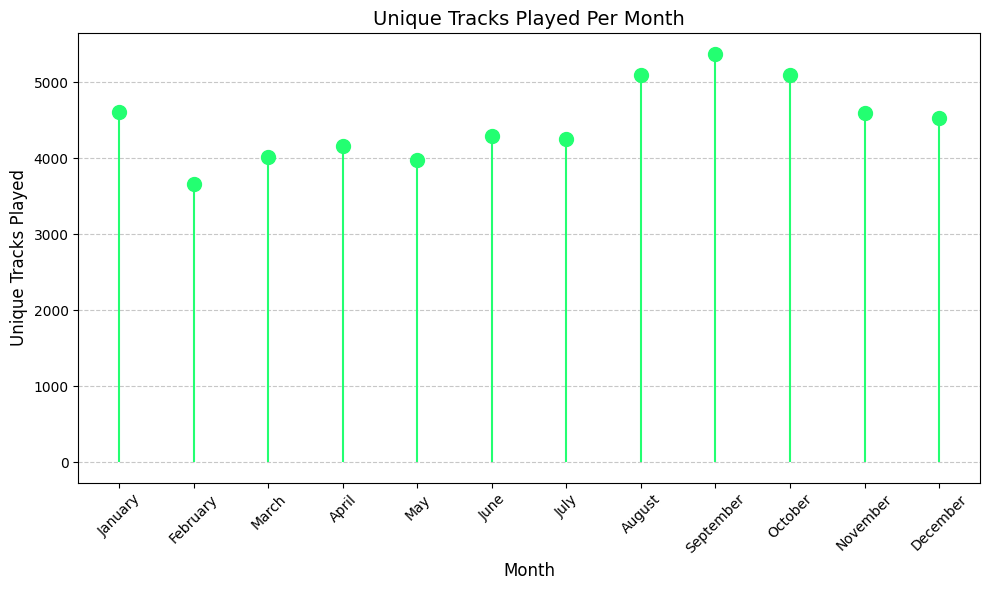

In [20]:
# Count unique tracks per month
unique_tracks_per_month = df.groupby('month')['spotify_track_uri'].nunique()

# Ensure months are sorted correctly
unique_tracks_per_month = unique_tracks_per_month.reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
]).dropna()

# Create the lollipop chart
fig, ax = plt.subplots(figsize=(10, 6))
months = unique_tracks_per_month.index
counts = unique_tracks_per_month.values

# Plot the vertical lines (without 'use_line_collection')
ax.stem(months, counts, basefmt=" ", linefmt="#23FF71", markerfmt="o")

# Add the markers on the lines
ax.scatter(months, counts, color='#23FF71', zorder=3, s=100)

# Customize the chart
ax.set_title('Unique Tracks Played Per Month', fontsize=14)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Unique Tracks Played', fontsize=12)
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart
folder_name = "images"
file_path = f"{folder_name}/monthPlaytime.png"
plt.tight_layout()
plt.savefig(file_path)
plt.show()

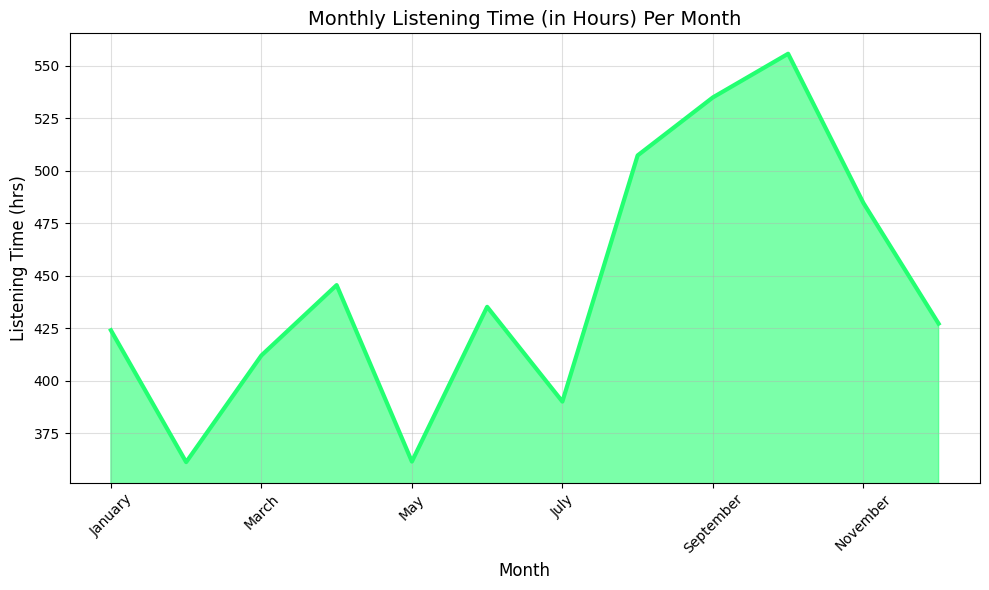

In [21]:
# Calculate total listening time per month
monthly_time = df.groupby('month')['hrs_played'].sum()

# Ensure months are sorted correctly
monthly_time = monthly_time.reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
]).dropna()

# Plotting the area chart
plt.figure(figsize=(10, 6))
ax = monthly_time.plot(
    kind='area',
    color='#23FF71',
    alpha=0.6  # Transparency for the area
)

# Draw the line on top with a bolder, custom color
ax.plot(monthly_time.index, monthly_time.values, color='#23FF71', linewidth=3)  # Bold line

# Customizing the chart
plt.title('Monthly Listening Time (in Hours) Per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Listening Time (hrs)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.4)

# Save and display the chart
folder_name = "images"
file_path = f"{folder_name}/monthlyLTArea.png"
plt.tight_layout()
plt.savefig(file_path)
plt.show()

In [22]:
df.to_csv('spotify_historyUpd.csv', index=False)